# Regression

- Linear regression
- ElasticNet
- decision tree regression
- Random forest regression


In [1]:
# We load the data
import pandas as pd

data_df = pd.read_csv("./data_regression.csv", index_col=["Id"])
data_df


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
data_df.shape


(1460, 80)

## Data preparation

In [3]:
## Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder

col_cat = data_df.select_dtypes(include=[object]).columns
data_df_enc = data_df.copy()

for col in col_cat:
    le = LabelEncoder()

    data_df_enc[col] = le.fit_transform(data_df_enc[col])

data_df_enc


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,3,62.0,7917,1,2,3,3,0,4,...,0,3,4,4,0,8,2007,8,4,175000
1457,20,3,85.0,13175,1,2,3,3,0,4,...,0,3,2,4,0,2,2010,8,4,210000
1458,70,3,66.0,9042,1,2,3,3,0,4,...,0,3,0,2,2500,5,2010,8,4,266500


In [4]:
# We one-hot encoding
data_df_oh = pd.get_dummies(data_df, drop_first=True)
data_df_oh


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
data_df_oh.fillna(data_df_oh.median(), inplace=True)
data_df_enc.fillna(data_df_enc.median(), inplace=True)


In [16]:
## We split the data into train and test
from sklearn.model_selection import train_test_split

y = data_df_oh["SalePrice"]
X_oh = data_df_oh.drop(columns=["SalePrice"])
X_enc = data_df_enc.drop(columns=["SalePrice"])

X_oh_train, X_oh_test, X_enc_train, X_enc_test, y_train, y_test = train_test_split(
    X_oh, X_enc, y, test_size=0.40, random_state=42
)


## Predictive modeling

In [7]:
## We use linear regression

from sklearn.linear_model import LinearRegression

rg = LinearRegression()
rg.fit(X_oh_train, y_train)
rg.predict(X_oh_test)


array([ 158096.97029748,  346575.27154783,   94888.52029459,
        181629.64911864,  331250.73151979,   76260.22283896,
        240032.5016135 ,  145830.04420957,   71877.93047147,
        150401.01703001,  147381.78973115,  106204.0493271 ,
         44682.74294476,  227361.36975579,  171407.06097275,
        134062.35254214,  185759.26730334,  121745.82191782,
        124974.0791806 ,  211664.77663062,  166463.89710449,
        203777.57473663,  180373.84336592,  137243.99079096,
        201900.23807685,  138800.22059062,  195326.081125  ,
        112276.42101431,  175682.28795544,  193010.73429995,
        135160.71438355,  285079.04613313,  239012.92427633,
        104188.32684729,  241659.58986144,  147515.03384858,
        145862.90727129,  196200.38055112,  305588.69991754,
        132340.40223237,  123471.14952406,  216209.69258675,
        111041.80580134,  376652.35879192,  134890.9015145 ,
        121791.98238812,  102849.30534803,  144189.73066764,
        415633.9640222 ,

In [8]:
rg_oh = LinearRegression()
rg_oh.fit(X_oh_train, y_train)

rg_enc = LinearRegression()
rg_enc.fit(X_enc_train, y_train)


pred_df = pd.DataFrame(
    {
        "target": y_test,
        "prediction_oh": rg_oh.predict(X_oh_test),
        "prediction_enc": rg_enc.predict(X_enc_test),
    }
)
pred_df


,target,prediction_oh,prediction_enc
Id,,,
893,154500,158096.970297,146182.300950
1106,325000,346575.271548,309684.295719
414,115000,94888.520295,113656.508591
523,159000,181629.649119,182038.357879
1037,315500,331250.731520,317791.978334
...,...,...,...
1331,227000,225061.102869,263013.036061
1104,159500,164750.855744,171322.641188
753,217000,222804.495611,195741.283196


In [9]:
(pred_df["target"] - pred_df["prediction_oh"]).pow(2).mean() ** 0.5


42431.430714029295

In [11]:
from sklearn import metrics

print(metrics.mean_squared_error(pred_df["target"], pred_df["prediction_oh"]) ** 0.5)
print(metrics.mean_squared_error(pred_df["target"], pred_df["prediction_enc"]) ** 0.5)


42431.430714029295
36515.21696379484


In [32]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr_reg = LinearRegression()
rd_reg = Ridge()
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()


In [33]:
lr_reg.fit(X_enc_train, y_train)
rd_reg.fit(X_enc_train, y_train)
tree_reg.fit(X_enc_train, y_train)
rf_reg.fit(X_enc_train, y_train)

pred_df = pd.DataFrame(
    {
        "target": y_test,
        "pred_lr": lr_reg.predict(X_enc_test),
        "pred_rd": rd_reg.predict(X_enc_test),
        "pred_tree": tree_reg.predict(X_enc_test),
        "pred_rf": rf_reg.predict(X_enc_test),
    }
)

pred_df


,target,pred_lr,pred_en,pred_tree,pred_rf
Id,,,,,
893,154500,146182.300950,146020.243171,139000.0,138208.25
1106,325000,309684.295719,309954.879455,260000.0,302249.41
414,115000,113656.508591,112775.749868,100000.0,119060.85
523,159000,182038.357879,182661.493018,129500.0,157756.00
1037,315500,317791.978334,317961.849736,285000.0,325564.82
...,...,...,...,...,...
1331,227000,263013.036061,262986.330607,232000.0,247522.73
1104,159500,171322.641188,170756.422004,129000.0,145923.00
753,217000,195741.283196,196511.857613,204000.0,197299.49


In [43]:
(
    pred_df.apply(
        lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5
    ).sort_values(ascending=True)
).to_frame(name="MSE")


,MSE
target,0.000000
pred_lr,24656.142992
pred_en,26937.361120
pred_rf,32314.817414
pred_tree,42679.109040


In [35]:
lr_reg.fit(X_oh_train, y_train)
rd_reg.fit(X_oh_train, y_train)
tree_reg.fit(X_oh_train, y_train)
rf_reg.fit(X_oh_train, y_train)

pred_df = pd.DataFrame(
    {
        "target": y_test,
        "pred_lr": lr_reg.predict(X_oh_test),
        "pred_rd": rd_reg.predict(X_oh_test),
        "pred_tree": tree_reg.predict(X_oh_test),
        "pred_rf": rf_reg.predict(X_oh_test),
    }
)

pred_df


,target,pred_lr,pred_EN,pred_tree,pred_RF
Id,,,,,
893,154500,158096.970297,157268.282020,152000.0,140612.25
1106,325000,346575.271548,334089.800411,267000.0,301195.65
414,115000,94888.520295,95792.023264,109900.0,119350.25
523,159000,181629.649119,192034.631367,160000.0,149330.34
1037,315500,331250.731520,328984.485648,320000.0,328139.95
...,...,...,...,...,...
1331,227000,225061.102869,236122.688951,235128.0,248575.31
1104,159500,164750.855744,189863.865792,125000.0,142625.50
753,217000,222804.495611,214640.628071,180000.0,197239.25


In [44]:
(
    pred_df.apply(
        lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5
    ).sort_values(ascending=True)
).to_frame(name="MSE")


,MSE
target,0.000000
pred_lr,24656.142992
pred_en,26937.361120
pred_rf,32314.817414
pred_tree,42679.109040


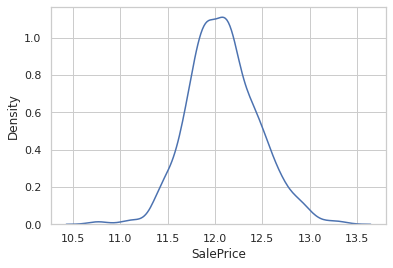

In [42]:
%matplotlib inline
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
sns.kdeplot(np.log(y_train + 10000));

In [37]:
import numpy as np

lr_reg.fit(X_enc_train, np.log(y_train + 1))
rd_reg.fit(X_enc_train, np.log(y_train + 1))
tree_reg.fit(X_enc_train, np.log(y_train + 1))
rf_reg.fit(X_enc_train, np.log(y_train + 1))

pred_df = pd.DataFrame(
    {
        "target": y_test,
        "pred_lr": np.exp(lr_reg.predict(X_enc_test)) - 1,
        "pred_rd": np.exp(rd_reg.predict(X_enc_test)) - 1,
        "pred_tree": np.exp(tree_reg.predict(X_enc_test)) - 1,
        "pred_rf": np.exp(rf_reg.predict(X_enc_test)) - 1,
    }
)

pred_df


,target,pred_lr,pred_rd,pred_tree,pred_rf
Id,,,,,
893,154500,149983.096943,149864.262909,145000.0,135965.801645
1106,325000,312698.663921,313041.789636,281213.0,305846.887173
414,115000,117362.445367,116907.693198,120000.0,124481.513151
523,159000,174593.398966,174944.636613,163000.0,160113.988794
1037,315500,322554.811071,322744.444094,325000.0,323689.571577
...,...,...,...,...,...
1331,227000,247642.384666,247701.930856,245000.0,246842.794794
1104,159500,173833.416474,173372.202507,146800.0,140859.291409
753,217000,188463.585996,188953.311151,208900.0,192003.401316


In [45]:
(
    pred_df.apply(
        lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5
    ).sort_values(ascending=True)
).to_frame(name="MSE")


,MSE
target,0.000000
pred_lr,24656.142992
pred_en,26937.361120
pred_rf,32314.817414
pred_tree,42679.109040


In [39]:
lr_reg.fit(X_oh_train, np.log(y_train + 1))
rd_reg.fit(X_oh_train, np.log(y_train + 1))
tree_reg.fit(X_oh_train, np.log(y_train + 1))
rf_reg.fit(X_oh_train, np.log(y_train + 1))

pred_df = pd.DataFrame(
    {
        "target": y_test,
        "pred_lr": np.exp(lr_reg.predict(X_oh_test)) - 1,
        "pred_en": np.exp(rd_reg.predict(X_oh_test)) - 1,
        "pred_tree": np.exp(tree_reg.predict(X_oh_test)) - 1,
        "pred_rf": np.exp(rf_reg.predict(X_oh_test)) - 1,
    }
)

pred_df


,target,pred_lr,pred_en,pred_tree,pred_rf
Id,,,,,
893,154500,152508.564770,152164.936108,145500.0,136059.692295
1106,325000,350259.870856,333361.889954,302000.0,300070.335900
414,115000,105000.052391,104910.887651,164500.0,121219.311077
523,159000,166327.636434,173358.822493,185000.0,154512.026487
1037,315500,319902.823794,318819.434480,277500.0,312443.634670
...,...,...,...,...,...
1331,227000,231854.561630,244397.105933,245000.0,249519.711531
1104,159500,148829.241508,169261.666790,151000.0,141761.154584
753,217000,201847.351903,196575.964065,193500.0,188813.032445


In [46]:
(
    pred_df.apply(
        lambda x: metrics.mean_squared_error(pred_df["target"], x) ** 0.5
    ).sort_values(ascending=True)
).to_frame(name="MSE")


,MSE
target,0.000000
pred_lr,24656.142992
pred_en,26937.361120
pred_rf,32314.817414
pred_tree,42679.109040
